In [2]:
import matplotlib as mplot
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D, axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
Nt = 29+1
T = 86400*290
dt = int(T/Nt) # 8.64e+05
dt

835200

In [4]:
Nx = 20
X = 1000
dx = int(X/Nx) # 50
dx

50

In [5]:
Ny = 20
Y = 1000
dy = int(Y/Ny) # 50
dy

50

In [6]:
k = 10**(-14)
mu = 0.005
B = 5 * 10**(-10)

Xi = k/(mu*B)
Xi = Xi*0.1
Xi = round(Xi, 5)
Xi
# '{:.0e}'.format(Xi) # '4.e-03'

0.0004

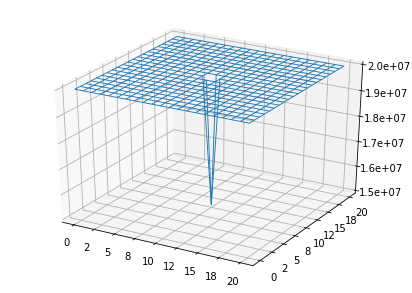

In [7]:
P_res = 2 * 10**7
N = np.zeros((21,21)) # initial pressure matrix

def init_pressure_dif(x, y):
    if (x == 500 and y == 500):
        return 1.5 * 10**7
    else:
        return 2 * 10**7

x = np.linspace(0, Nx, Nx+1)
y = np.linspace(0, Ny, Ny+1)

X, Y = np.meshgrid(y, x)

# начальный момент времени
for i in range(0, Nx+1):
    x = i * dx
    for j in range(0, Ny+1):
        y = j * dy
        N[i,j] = init_pressure_dif(x,y)


#  ____________ graph ______________
fig = plt.figure(figsize=(7,5))

ax = fig.gca(projection='3d')

ax.tick_params(axis='z', direction='out', pad=7)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1e'))

ax.plot_wireframe(X, Y, N, linewidth=.9)

# plt.show()

pd.options.display.float_format = '{:.2e}'.format

# pd.DataFrame(N)
plt.show()

In [8]:
N_count = (Nx+1)*(Ny+1)
Nw = (Nx + 1) * (Ny/2) + (Nx/2) # 220

A = np.zeros((N_count, N_count))

for i in range(0, N_count):
    if ( ( Nx+1 < i < N_count-(Nx+1) ) and (( i%(Nx+1) != 0) and ( i%(Nx+1) != 1)) and (i != Nw)):
        A[i, i] = 1 + ((2*dt*Xi)/dx**2) + ((2*dt*Xi)/dy**2)
        A[i, i+1] = -(dt/dy**2)*Xi
        A[i, i-1] = -(dt/dy**2)*Xi
        
        A[i, i+(Nx+1)] = -(dt/dx**2)*Xi
        A[i, i-(Nx+1)] = -(dt/dx**2)*Xi

    else:
        A[i,i] = 1

print("%.4f, %.4f, %.4f" % (A[217,216], A[217,217], A[217,218]))
print(A[220, 219])

-0.1336, 1.5345, -0.1336
0.0


In [9]:
B = np.zeros((441, 1))
# a matrix vector column initial P values
k = 0
for i in range(0, Nx+1):
    for j in range(0, Ny+1):
        B[k, 0] = N[i,j]
        k += 1


In [13]:
# Функция расчёта давления на временном слое
def pres_t_layers():
    P = np.zeros((Nt+1, Nx+1, Ny+1))
    m = np.zeros((Nx+1, Ny+1))
    B_new = np.copy(B)

    for kt in range(1, Nt+1):
        B_i = np.linalg.solve(A, B_new)
        k = 0
        for i in range(0, Nx+1):
            for j in range(0, Ny+1):
                m[i,j] = B_i[k]
                k += 1
        P[kt] = m
        #print(np.allclose(np.dot(M, B_i), B_new)) # check that the solution is correct
        B_new = B_i
    return P

final = pres_t_layers()

In [11]:
print(final[0, 10, 10])

0.0


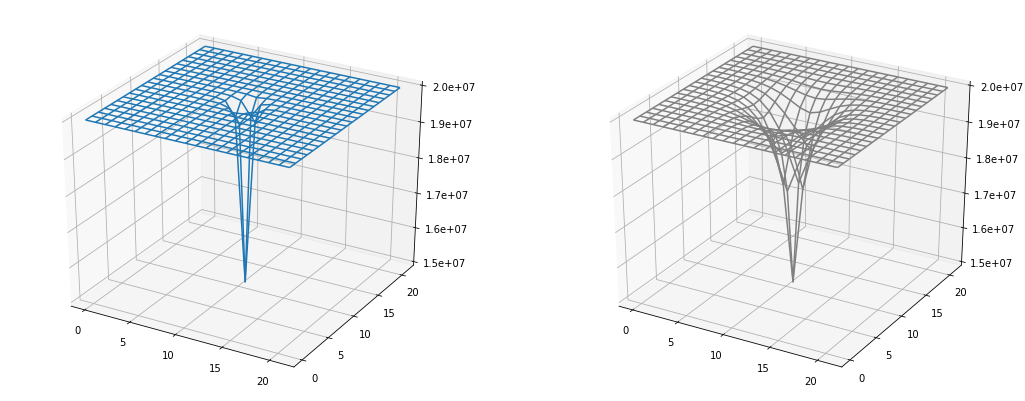

In [12]:
x = np.linspace(0, Nx+1, Nx+1)
y = np.linspace(0, Ny+1, Ny+1)

X, Y = np.meshgrid(y,x)

#  ____________ plane ______________
fig = plt.figure(figsize=(18,7))
# Воронка депрессии через 10 дней (final[1])
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_wireframe(X, Y, final[1])
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax.tick_params(axis='z', direction='out', pad=12)

# Воронка депрессии через 290 дней (final[Nt-1])
ay = fig.add_subplot(1,2,2, projection='3d')
ay.plot_wireframe(X, Y, final[Nt-1], color='gray')
ay.zaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ay.tick_params(axis='z', direction='out', pad=12)

plt.show()